# Using Cycles-utils Python package for post processing

[`Cycles-utils`](https://pypi.org/project/Cycles-utils/) is a Python package designed to facilitate Cycles agroecosystem model simulations.
This package provides a number of tools for users to prepare Cycles simulation input files, run Cycles simulations, and post-process Cycles simulation results.

The package can be installed using

```shell
pip install Cycles-utils
```

Please refer to the [documentation](https://psumodeling.github.io/Cycles-utils/) for details.

## Run multiple Cycles simulations using Cycles runner

In [1]:
import pandas as pd
from cycles import CyclesRunner

CYCLES = './Cycles'

YEAR_START=1981
YEAR_END=2016

simulation_name = lambda row: row['simulation']

control_dict = lambda row: {
    'simulation_start_date': YEAR_START,
    'simulation_end_date': YEAR_END,
    'rotation_size': row['rotation_years'],
    'crop_file': 'GenericCrops.crop',
    'operation_file': row['operation_file'],
    'soil_file': 'GenericHagerstown.soil',
    'weather_file': 'RockSprings.weather',
}

cycles_runner = CyclesRunner(
    simulations=pd.read_csv('input/simulations.csv'),
    summary='summary.csv',
    simulation_name=simulation_name,
    control_dict=control_dict,
)

cycles_runner.run(CYCLES, options='-s')

CornSoyWheatPasture_demo - Success
ContinuousCorn_demo - Success


## Read harvest output

In [2]:
from cycles import read_output
harvest_df, units = read_output('./', 'CornSoyWheatPasture_demo', 'harvest')
harvest_df.head()

,date,crop,planting_date,total_biomass,root_biomass,grain_yield,forage_yield,aboveground_residue,harvest_index,potential_transpiration,...,total_nitrogen,root_nitrogen,grain_nitrogen,forage_nitrogen,cumulative_nitrogen_stress,nitrogen_in_harvest,nitrogen_in_residue,nitrogen_concentration_in_forage,nitrogen_fixation,nitrogen_auto_added
0,1981-09-18,CornRM.90,1981-04-25,22.8819,3.1917,9.7736,0.0000,9.9166,0.4964,351.6113,...,172.9068,18.3081,106.5389,0.0000,0.1739,106.5389,48.0599,0.0000,0.0000,0.0
1,1982-10-17,SoybeanMG.5,1982-04-30,15.7644,1.8968,5.1894,0.0000,8.6783,0.3742,355.9223,...,381.2800,18.9876,214.8350,0.0000,0.0000,214.8350,147.4573,0.0000,292.4141,0.0
2,1983-06-21,WinterWheat,1982-10-15,0.0003,0.0000,0.0000,0.0000,0.0003,0.0000,164.4539,...,0.0000,0.0000,0.0000,0.0000,0.1170,0.0000,0.0000,0.0000,0.0000,0.0
3,1983-06-21,LotusCorniculatus,1983-03-16,0.0621,0.0250,0.0000,0.0352,0.0019,0.0000,4.1985,...,2.0474,0.2815,0.0000,1.6489,0.0000,0.0000,0.3984,4.6796,5.6090,0.0
4,1983-06-21,WhiteClover,1983-03-16,0.1088,0.0440,0.0000,0.0616,0.0032,0.0000,5.3329,...,3.6718,0.4967,0.0000,2.9706,0.0000,0.0000,0.7012,4.8251,7.1169,0.0


## Plot crop yield

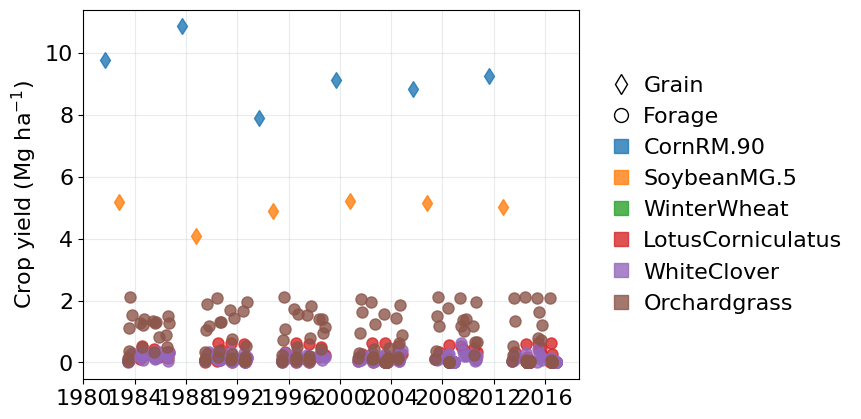

In [3]:
import matplotlib.pyplot as plt
from cycles import plot_yield

plt.rcParams.update({'font.size': 16})
plot_yield(harvest_df)